In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [178]:
data_file = "conso.txt"

In [179]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [180]:
text='test'
filename='text.txt'
#save_text(filename)

In [181]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [182]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


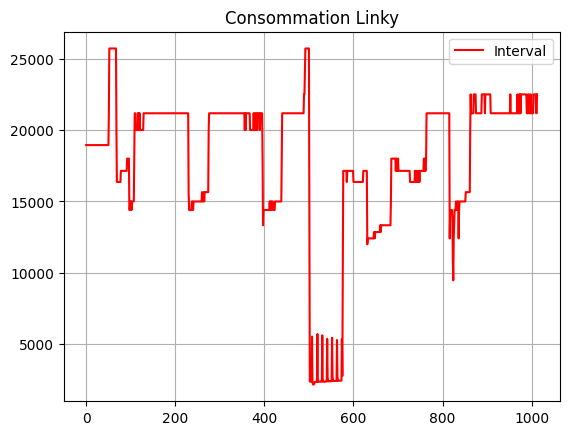

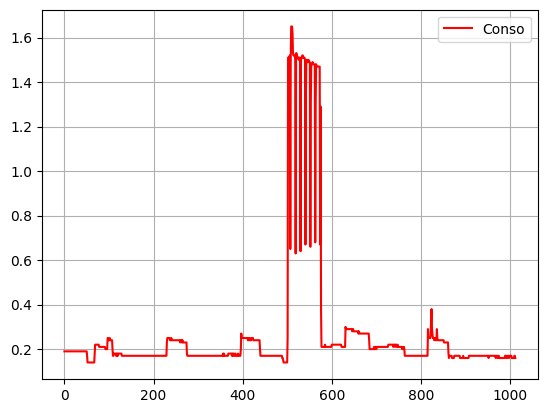

In [183]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [184]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [185]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117736 entries, 0 to 117735
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  117736 non-null  int64  
 1   kWh       117736 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [186]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
117731,23854,0.15
117732,23812,0.15
117733,23957,0.15
117734,23821,0.15


<Axes: >

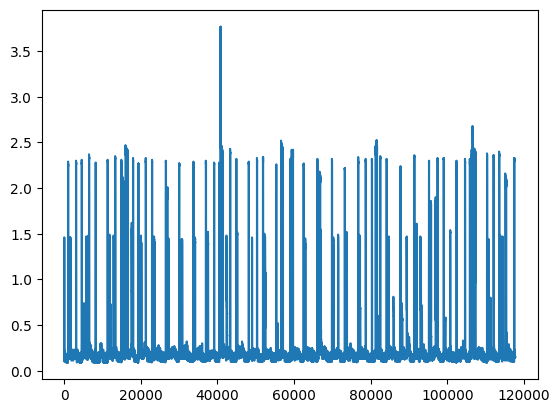

In [187]:
conso_data['kWh'].plot()

In [188]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
117731,23854,0.15,23.854,150.918085,2788078069
117732,23812,0.15,23.812,151.184277,2788101881
117733,23957,0.15,23.957,150.269232,2788125838
117734,23821,0.15,23.821,151.127157,2788149659


In [189]:
# index dernier echantillon
l=len(conso_data)-1
l

117735

In [190]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2788173524000

In [191]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 39, 23, 999003)

In [192]:
old

False

In [155]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117692 entries, 0 to 117691
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   117692 non-null  int64         
 1   kWh        117692 non-null  float64       
 2   sec        117692 non-null  float64       
 3   Wh         117692 non-null  float64       
 4   cumul(ms)  117692 non-null  int64         
 5   dates      117692 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 5.4 MB


In [156]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:40:03.334529,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:40:29.577529,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:40:55.462529,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:41:21.216529,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:41:46.990529,07/03/2024
...,...,...,...,...,...,...,...
117687,23193,0.16,23.193,155.219247,2787015429,2024-04-08 07:49:52.474529,08/04/2024
117688,23796,0.15,23.796,151.285930,2787039225,2024-04-08 07:50:16.270529,08/04/2024
117689,23745,0.15,23.745,151.610865,2787062970,2024-04-08 07:50:40.015529,08/04/2024
117690,23891,0.15,23.891,150.684358,2787086861,2024-04-08 07:51:03.906529,08/04/2024


In [157]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:40:03.334529   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 117691     24013  0.15  24.013  149.918794  2787110874   
 
                             dates        days  
 117691 2024-04-08 07:51:27.919529  08/04/2024  )

In [158]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('08/04/2024', 4, 2024)

In [159]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
116703,28452,0.13,28.452,126.528891,2758823590,2024-04-08 00:00:00.635529,08/04/2024
116704,28143,0.13,28.143,127.918132,2758851733,2024-04-08 00:00:28.778529,08/04/2024
116705,27187,0.13,27.187,132.416228,2758878920,2024-04-08 00:00:55.965529,08/04/2024
116706,26647,0.14,26.647,135.099636,2758905567,2024-04-08 00:01:22.612529,08/04/2024
116707,26881,0.13,26.881,133.923589,2758932448,2024-04-08 00:01:49.493529,08/04/2024
...,...,...,...,...,...,...,...
117687,23193,0.16,23.193,155.219247,2787015429,2024-04-08 07:49:52.474529,08/04/2024
117688,23796,0.15,23.796,151.285930,2787039225,2024-04-08 07:50:16.270529,08/04/2024
117689,23745,0.15,23.745,151.610865,2787062970,2024-04-08 07:50:40.015529,08/04/2024
117690,23891,0.15,23.891,150.684358,2787086861,2024-04-08 07:51:03.906529,08/04/2024


In [160]:
day

'08/04/2024'

In [161]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:40:03.334529,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:40:29.577529,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:40:55.462529,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:41:21.216529,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:41:46.990529,07/03/2024
...,...,...,...,...,...,...,...
117687,23193,0.16,23.193,155.219247,2787015429,2024-04-08 07:49:52.474529,08/04/2024
117688,23796,0.15,23.796,151.285930,2787039225,2024-04-08 07:50:16.270529,08/04/2024
117689,23745,0.15,23.745,151.610865,2787062970,2024-04-08 07:50:40.015529,08/04/2024
117690,23891,0.15,23.891,150.684358,2787086861,2024-04-08 07:51:03.906529,08/04/2024


In [162]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [165]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.159
08/03/2024,3.752
09/03/2024,3.083
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.534
14/03/2024,3.663
15/03/2024,3.561


In [171]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.31104
dtype: float64

In [172]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.566424
dtype: float64

In [174]:
filename='conso_par_jour.csv'
df = grouped.count()/1000
df.to_csv(filename)
filename='../conso_par_jour.csv'
df.to_csv(filename)

In [175]:
df.tail(7)

,kWh
days,
02/04/2024,3.820
03/04/2024,3.417
04/04/2024,3.478
05/04/2024,4.412
06/04/2024,3.404
07/04/2024,4.074
08/04/2024,0.989


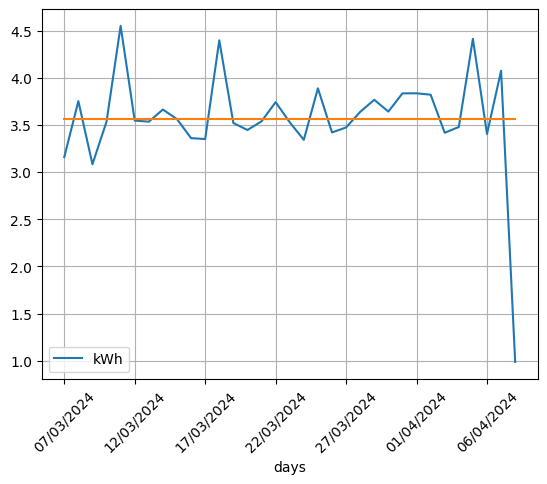

In [176]:
df.plot()#kind='bar')
plt.plot((0,len(df)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [ ]:
#manuel
#day = '11/03/2024'


In [ ]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

878

In [ ]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
116705,27187,0.13,27.187,132.416228,2758878920,2024-04-08 00:00:23.624073,08/04/2024
116706,26647,0.14,26.647,135.099636,2758905567,2024-04-08 00:00:50.271073,08/04/2024
116707,26881,0.13,26.881,133.923589,2758932448,2024-04-08 00:01:17.152073,08/04/2024
116708,27720,0.13,27.720,129.870130,2758960168,2024-04-08 00:01:44.872073,08/04/2024
116709,27656,0.13,27.656,130.170668,2758987824,2024-04-08 00:02:12.528073,08/04/2024
...,...,...,...,...,...,...,...
117578,22096,0.16,22.096,162.925416,2784774860,2024-04-08 07:11:59.564073,08/04/2024
117579,22497,0.16,22.497,160.021336,2784797357,2024-04-08 07:12:22.061073,08/04/2024
117580,22243,0.16,22.243,161.848671,2784819600,2024-04-08 07:12:44.304073,08/04/2024
117581,22433,0.16,22.433,160.477867,2784842033,2024-04-08 07:13:06.737073,08/04/2024


In [ ]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [ ]:
df

,kWh
days,
07/03/2024,3.161
08/03/2024,3.752
09/03/2024,3.082
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.534
14/03/2024,3.664
15/03/2024,3.560


In [ ]:
conso_day.head(1).dates, conso_day.tail(1).dates


(116705   2024-04-08 00:00:23.624073
 Name: dates, dtype: datetime64[ns],
 117582   2024-04-08 07:13:29.050073
 Name: dates, dtype: datetime64[ns])

In [ ]:
conso_day.loc[:,'dates']

116705   2024-04-08 00:00:23.624073
116706   2024-04-08 00:00:50.271073
116707   2024-04-08 00:01:17.152073
116708   2024-04-08 00:01:44.872073
116709   2024-04-08 00:02:12.528073
                    ...            
117578   2024-04-08 07:11:59.564073
117579   2024-04-08 07:12:22.061073
117580   2024-04-08 07:12:44.304073
117581   2024-04-08 07:13:06.737073
117582   2024-04-08 07:13:29.050073
Name: dates, Length: 878, dtype: datetime64[ns]

In [ ]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:23,27187,0.13,27.187,132.416228,2758878920,2024-04-08 00:00:23.624073,08/04/2024
0:0:50,26647,0.14,26.647,135.099636,2758905567,2024-04-08 00:00:50.271073,08/04/2024
0:1:17,26881,0.13,26.881,133.923589,2758932448,2024-04-08 00:01:17.152073,08/04/2024
0:1:44,27720,0.13,27.720,129.870130,2758960168,2024-04-08 00:01:44.872073,08/04/2024
0:2:12,27656,0.13,27.656,130.170668,2758987824,2024-04-08 00:02:12.528073,08/04/2024
...,...,...,...,...,...,...,...
7:11:59,22096,0.16,22.096,162.925416,2784774860,2024-04-08 07:11:59.564073,08/04/2024
7:12:22,22497,0.16,22.497,160.021336,2784797357,2024-04-08 07:12:22.061073,08/04/2024
7:12:44,22243,0.16,22.243,161.848671,2784819600,2024-04-08 07:12:44.304073,08/04/2024


In [ ]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('07:13:31', 0.878)

In [ ]:
df['kWh']

heure
0:0:23     0.13
0:0:50     0.14
0:1:17     0.13
0:1:44     0.13
0:2:12     0.13
           ... 
7:11:59    0.16
7:12:22    0.16
7:12:44    0.16
7:13:6     0.16
7:13:29    0.16
Name: kWh, Length: 878, dtype: float64

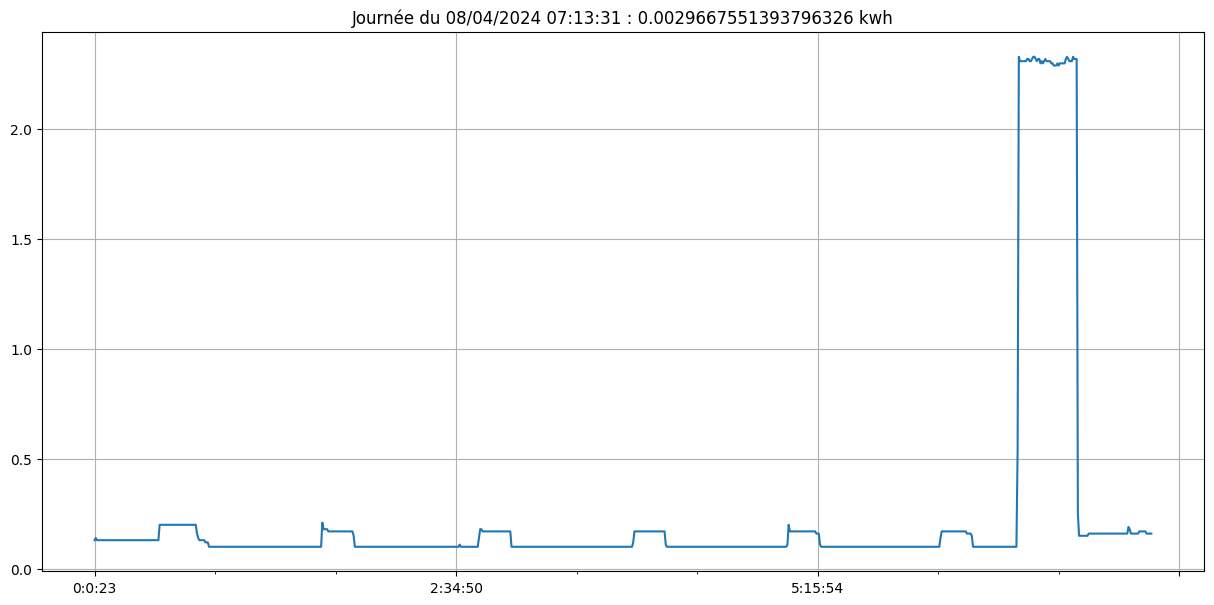

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [ ]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [ ]:
df['power']

heure
0:0:23     0.13
0:0:50     0.14
0:1:17     0.13
0:1:44     0.13
0:2:12     0.13
           ... 
7:11:59    0.16
7:12:22    0.16
7:12:44    0.16
7:13:6     0.16
7:13:29    0.16
Name: power, Length: 878, dtype: float64

<Axes: xlabel='heure'>

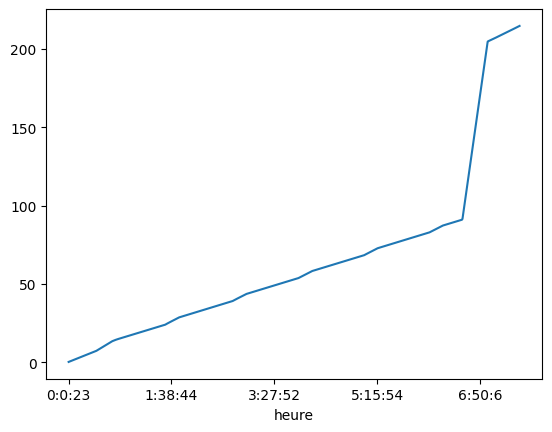

In [ ]:
evo=df['power'].cumsum()
evo.plot()

50

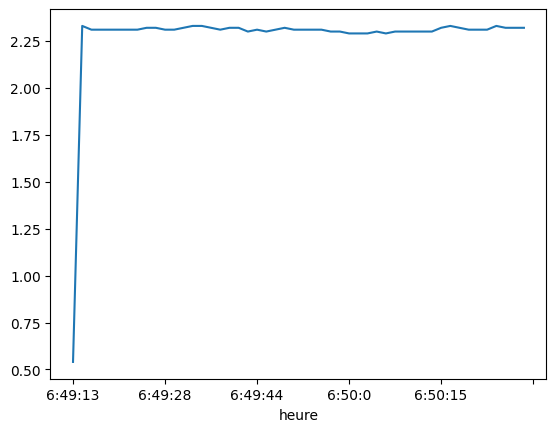

In [ ]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

295

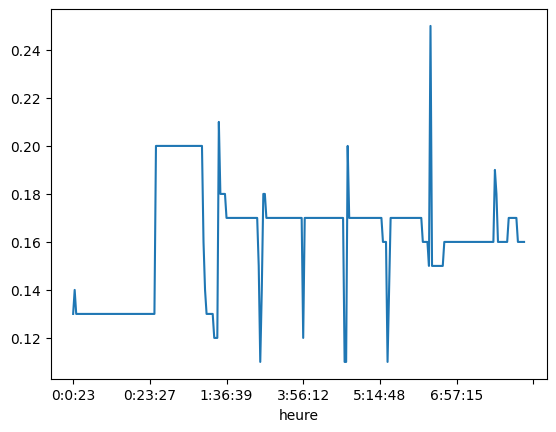

In [ ]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

828

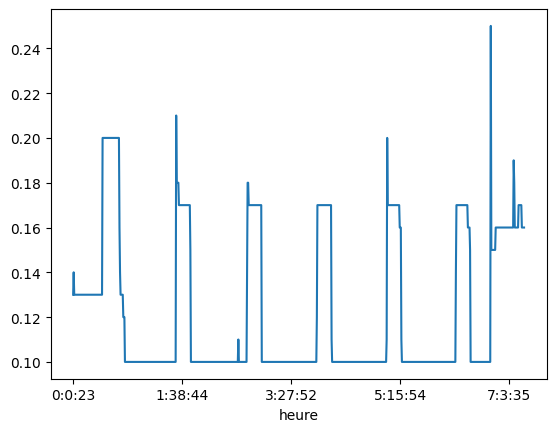

In [ ]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [ ]:
time = conso_data['dates']
time


0        2024-03-07 01:39:30.993073
1        2024-03-07 01:39:57.236073
2        2024-03-07 01:40:23.121073
3        2024-03-07 01:40:48.875073
4        2024-03-07 01:41:14.649073
                    ...            
117578   2024-04-08 07:11:59.564073
117579   2024-04-08 07:12:22.061073
117580   2024-04-08 07:12:44.304073
117581   2024-04-08 07:13:06.737073
117582   2024-04-08 07:13:29.050073
Name: dates, Length: 117583, dtype: datetime64[ns]

In [ ]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [ ]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [ ]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

NameError: name 'MultipleLocator' is not defined

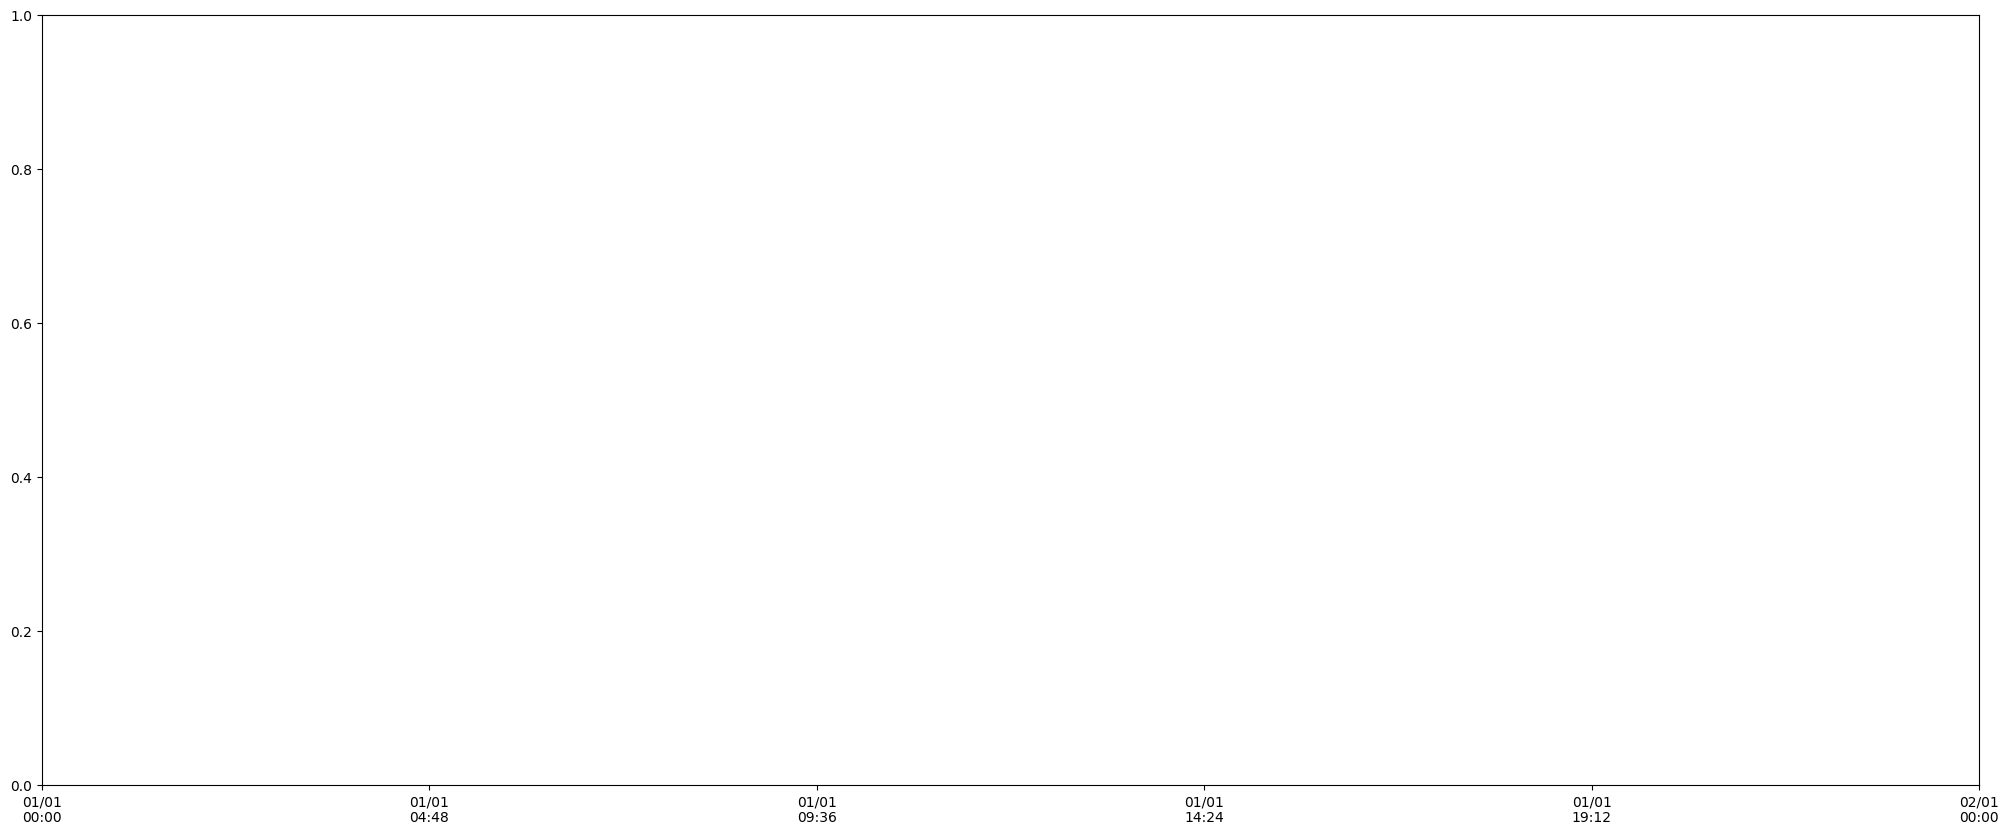

In [ ]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [ ]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
117582,22313,0.16,22.313,161.340922,2784864346,2024-04-08 07:13:29.050073,08/04/2024


In [ ]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2784864346000

# Slice of last 1 kWh

In [ ]:
l = len(conso_data)  # total watt consommés
l

117583

In [ ]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(117583, 1000)

In [ ]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [ ]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 116583     26724  0.13  26.724  134.710373  2755815983   
 116584     26758  0.13  26.758  134.539203  2755842741   
 116585     26805  0.13  26.805  134.303302  2755869546   
 116586     26780  0.13  26.780  134.428678  2755896326   
 116587     26783  0.13  26.783  134.413621  2755923109   
 ...          ...   ...     ...         ...         ...   
 117578     22096  0.16  22.096  162.925416  2784774860   
 117579     22497  0.16  22.497  160.021336  2784797357   
 117580     22243  0.16  22.243  161.848671  2784819600   
 117581     22433  0.16  22.433  160.477867  2784842033   
 117582     22313  0.16  22.313  161.340922  2784864346   
 
                             dates        days  
 116583 2024-04-07 23:09:20.687073  07/04/2024  
 116584 2024-04-07 23:09:47.445073  07/04/2024  
 116585 2024-04-07 23:10:14.250073  07/04/2024  
 116586 2024-04-07 23:10:41.030073  07/04/2024  
 116587 2024-04-07 23:11:07.813073  07

In [ ]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [ ]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [ ]:
cumtime_end,cumtime_start

(2784864346000, 2755842741000)

In [ ]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

29021605000

In [ ]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 8, 7, 13, 36, 964701),
 datetime.datetime(2024, 4, 7, 23, 9, 55, 359701),
 '08/04/2024 07:13:29')

In [ ]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:39:30.993073,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:39:57.236073,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:40:23.121073,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:40:48.875073,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:41:14.649073,07/03/2024
...,...,...,...,...,...,...,...
117578,22096,0.16,22.096,162.925416,2784774860,2024-04-08 07:11:59.564073,08/04/2024
117579,22497,0.16,22.497,160.021336,2784797357,2024-04-08 07:12:22.061073,08/04/2024
117580,22243,0.16,22.243,161.848671,2784819600,2024-04-08 07:12:44.304073,08/04/2024
117581,22433,0.16,22.433,160.477867,2784842033,2024-04-08 07:13:06.737073,08/04/2024


In [ ]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('07/04/2024 23:09:47', '08/04/2024 07:13:29')

In [ ]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-07 23:09:20.687073', '2024-04-08 07:13:29.050073')

In [ ]:
k

1

In [ ]:
data.Interval.tail(1000)

116583    26724
116584    26758
116585    26805
116586    26780
116587    26783
          ...  
117578    22096
117579    22497
117580    22243
117581    22433
117582    22313
Name: Interval, Length: 1000, dtype: int64

In [ ]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(8.076413055555557, 2.9716162156281762, 8, 4, 35)

In [ ]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_14100\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [ ]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
116583,26724,0.13,26.724,134.710373,2755815983,2024-04-07 23:09:20.687073,07/04/2024,2024-04-07 23:09:20.687073
116584,26758,0.13,26.758,134.539203,2755842741,2024-04-07 23:09:47.445073,07/04/2024,2024-04-07 23:09:47.445073
116585,26805,0.13,26.805,134.303302,2755869546,2024-04-07 23:10:14.250073,07/04/2024,2024-04-07 23:10:14.250073
116586,26780,0.13,26.780,134.428678,2755896326,2024-04-07 23:10:41.030073,07/04/2024,2024-04-07 23:10:41.030073
116587,26783,0.13,26.783,134.413621,2755923109,2024-04-07 23:11:07.813073,07/04/2024,2024-04-07 23:11:07.813073
...,...,...,...,...,...,...,...,...
117578,22096,0.16,22.096,162.925416,2784774860,2024-04-08 07:11:59.564073,08/04/2024,2024-04-08 07:11:59.564073
117579,22497,0.16,22.497,160.021336,2784797357,2024-04-08 07:12:22.061073,08/04/2024,2024-04-08 07:12:22.061073
117580,22243,0.16,22.243,161.848671,2784819600,2024-04-08 07:12:44.304073,08/04/2024,2024-04-08 07:12:44.304073
117581,22433,0.16,22.433,160.477867,2784842033,2024-04-08 07:13:06.737073,08/04/2024,2024-04-08 07:13:06.737073


<Axes: >

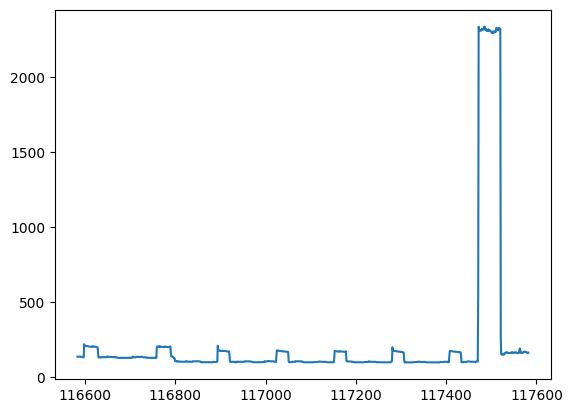

In [ ]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [ ]:
data['Wh']

116583    134.710373
116584    134.539203
116585    134.303302
116586    134.428678
116587    134.413621
             ...    
117578    162.925416
117579    160.021336
117580    161.848671
117581    160.477867
117582    161.340922
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

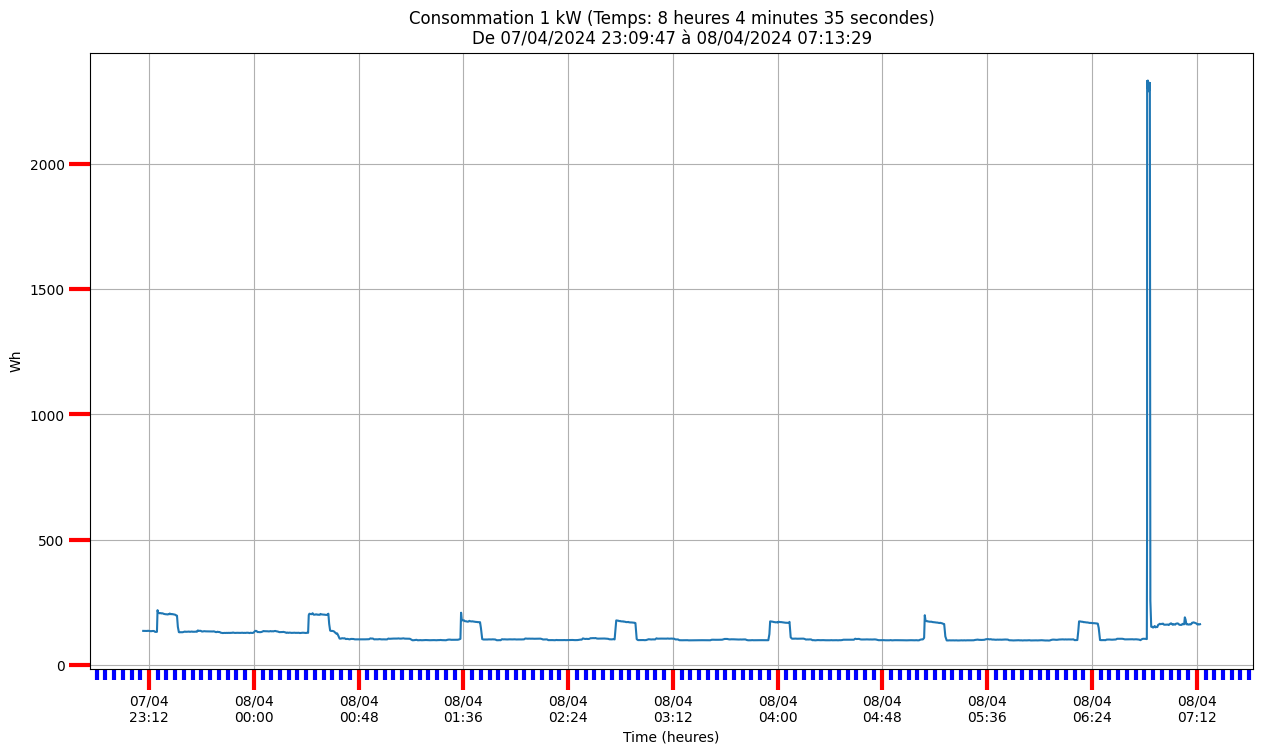

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

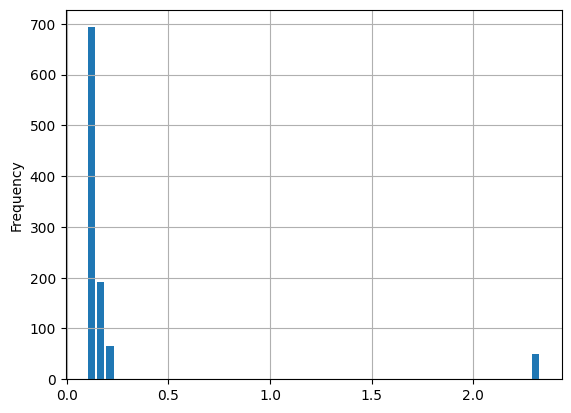

In [ ]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [ ]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
117578,22096,0.16,22.096,162.925416,2784774860,2024-04-08 07:11:59.564073,08/04/2024
117579,22497,0.16,22.497,160.021336,2784797357,2024-04-08 07:12:22.061073,08/04/2024
117580,22243,0.16,22.243,161.848671,2784819600,2024-04-08 07:12:44.304073,08/04/2024
117581,22433,0.16,22.433,160.477867,2784842033,2024-04-08 07:13:06.737073,08/04/2024
117582,22313,0.16,22.313,161.340922,2784864346,2024-04-08 07:13:29.050073,08/04/2024


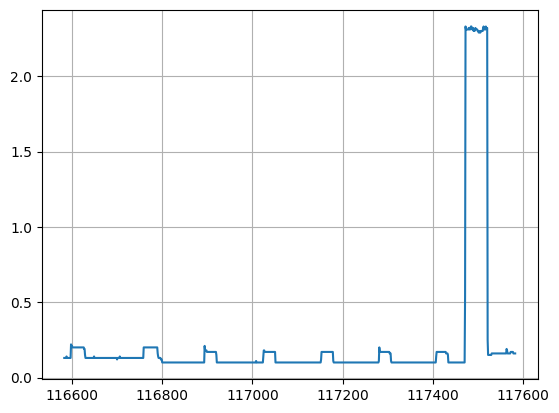

In [ ]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [ ]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(2784864346000.0, 46414.40576666666)

In [ ]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 8, 7, 13, 40, 488577),
 datetime.datetime(2024, 3, 7, 1, 39, 16, 142577))

In [ ]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(117583, 2784865, 773.5736111111111)

In [ ]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [ ]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [ ]:
732/12 # 60 jours

61.0

In [ ]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

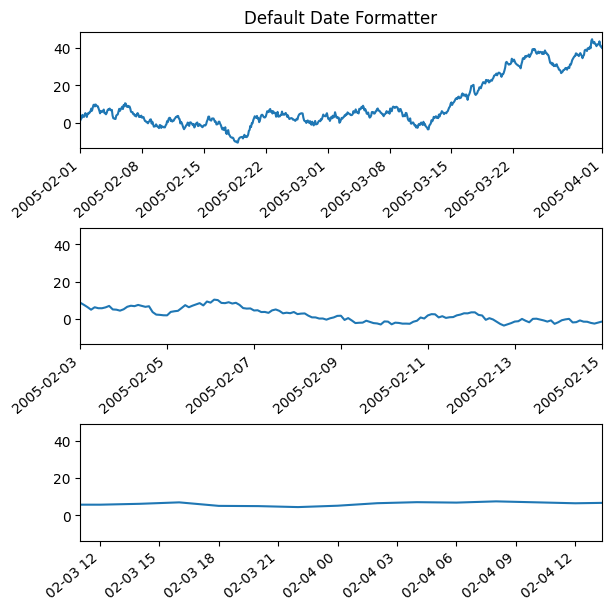

In [ ]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [ ]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)